# Konfigurasi Awal
Bagian konfigurasi awal untuk mendapatkan file input,
## Download from google cloud storage
Semua file input maupun output disimpan di cloud storage
### Nama file
file input: data/input-latest.csv
file output: data/output-latest.json
> Boleh juga jika modelnya ingin diexport
#### File input dikoleksi setiap hari dengan format input-timestamp.csv

In [1]:
import os

In [2]:
import sys
!{sys.executable} -m pip install python-dotenv

In [3]:
from dotenv import load_dotenv

load_dotenv()
os.environ["TFVERSION"] = "2.3"
os.environ["PYTHONVERSION"] = "3.7"

In [4]:
%%bash

mkdir -p data
gsutil -q -m cp gs://$BUCKET_NAME/data/input* data/

### Start code the machine learning

In [67]:
import tensorflow as tf
print(tf.__version__)

2.5.0


#### Import the Module
Import module that help the machine learning, also get the csv file and the model with wget

In [68]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!wget --no-check-certificate --quiet \
    'https://docs.google.com/uc?export=download&id=16--Ajvpw80UYpav_g35EOlZRR2_d6W7B' \
      -O data/sales_data_sample.csv
!wget --no-check-certificate --quiet \
    'https://docs.google.com/uc?export=download&id=1DBGPzhyKyxC9PnZPRRkl5swiyuGyoGD2' \
      -O data/model_data.h5

#### Check the dataset
Make sure to check that the dataset is what we will use.
Here we use a dataset of sales data sample from kaggle that already changed to be use for this machine learning.

In [70]:
data = pd.read_csv('data/sales_data_sample.csv', encoding='Latin-1', sep=';')
data.head()

,id,name,visitor,interest,place_id,contact
0,1,RUMAH PRODUKSI BUMBU UMAY,240,2,ChIJSbe7edeRei4RNsJWmGkQBPI,6.280000e+12
1,1,RUMAH PRODUKSI BUMBU UMAY,272,5,ChIJSbe7edeRei4RNsJWmGkQBPI,6.280000e+12
2,1,RUMAH PRODUKSI BUMBU UMAY,328,2,ChIJSbe7edeRei4RNsJWmGkQBPI,6.280000e+12
3,1,RUMAH PRODUKSI BUMBU UMAY,360,6,ChIJSbe7edeRei4RNsJWmGkQBPI,6.280000e+12
4,1,RUMAH PRODUKSI BUMBU UMAY,392,14,ChIJSbe7edeRei4RNsJWmGkQBPI,6.280000e+12


#### List for every name of place destination
Iterate over column 
```
data['name']
```
and pass every name of place that we need to get the value

In [71]:
list = data['name'].tolist()
list_id = data['place_id'].tolist()
place = []
id = []
for i in list:
  if i in place:
    pass
  else:
    place.append(i)
for i in list_id:
  if i not in id:
    id.append(i)
print(place)
print(id)

['RUMAH PRODUKSI BUMBU UMAY', 'Sirup Jahe Dewa', 'Sambal Mbak Ririn', 'Sambal Pawon Soendari Magelang', 'Getuk Eco', 'Furnistic Woodworking - Custom Furniture dan Craft Kayu Magelang', "Coklat Bar dan Karakter Magelang De'Imutz Choco", 'Kebon Ndoro', 'Sambal Lidah Mertua', 'RACIK SEWU produsen jahe instan', 'Encah Cake & Bakery', 'BHF (Borobudur Home Furniture)']
['ChIJSbe7edeRei4RNsJWmGkQBPI', 'ChIJu1cJaGWPei4R2PH1rwpq4gg', 'ChIJUUAuMWSFei4R0SORqr3pquU', 'ChIJzZ8nRZCFei4RXmg0wdxJ23s', 'ChIJe6ObOVyPei4Rr9PqdGqxtkE', 'ChIJeY8vdemPei4R2VFzRhZ962Y', 'ChIJlW3lDyKPei4RqnWNwt7NEUc', 'ChIJF1IWjDWPei4RzjRzFIKz4fY', 'ChIJBcNmWxuPei4RqnVkfViu6cY', 'ChIJb8Pj_vqLei4R0n3R3m9AHl8', 'ChIJIRS_ASOPei4RcY0dVHE_ZKA', 'ChIJf6ZhBo6Lei4Rda2bSZnt8fs']


#### Plotting the data
Here, create a function for make a plot series and data for each place.

Each steps is equal to one day.

Dont need to plot every place, but if we want just clear the hash (#) symbol

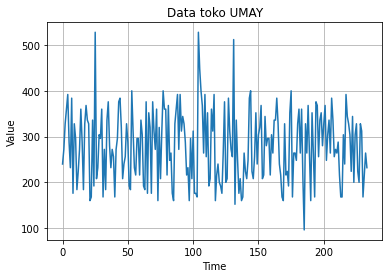

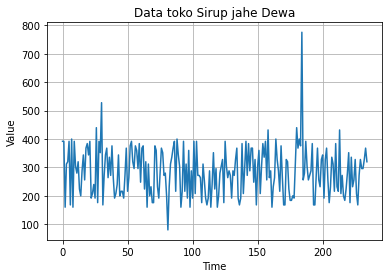

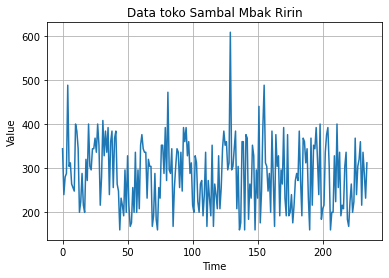

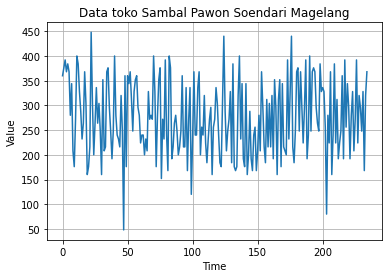

In [72]:
def plot_series(time, series, format="-", start=0, end=None, label=''):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.title(label)

def prepare_data(nama):
  prep_data = data[data['name'] == nama]
  prep_series = prep_data['visitor'].to_numpy(dtype='float64')
  prep_steps = np.arange(len(prep_data), dtype='float64')
  return prep_series, prep_steps

series = data['visitor'].to_numpy(dtype='float64')
time = np.arange(len(data), dtype='float64')

series1, steps1 = prepare_data(place[0])
series2, steps2 = prepare_data(place[1])
series3, steps3 = prepare_data(place[2])
series4, steps4 = prepare_data(place[3])
series5, steps5 = prepare_data(place[4])
series6, steps6 = prepare_data(place[5])
series7, steps7 = prepare_data(place[6])
series8, steps8 = prepare_data(place[7])
series9, steps9 = prepare_data(place[8])
series10, steps10= prepare_data(place[9])
series11, steps11 = prepare_data(place[10])
series12, steps12 = prepare_data(place[11])


plt.show(plot_series(steps1, series1, label='Data toko UMAY'))
plt.show(plot_series(steps2, series2, label='Data toko Sirup jahe Dewa'))
plt.show(plot_series(steps3, series3, label='Data toko Sambal Mbak Ririn'))
plt.show(plot_series(steps4, series4, label='Data toko Sambal Pawon Soendari Magelang'))
#plt.show(plot_series(steps_eco, series_eco, label='Data toko Getuk Eco'))
#plt.show(plot_series(steps_wood, series_wood, label='Data toko Furnistic Woodworking - Custom Furniture dan Craft Kayu Magelang'))
#plt.show(plot_series(steps_choco, series_choco, label='Data toko ' + place[6]))
#plt.show(plot_series(steps_ndoro, series_ndoro, label='Data toko ' + place[7]))
#plt.show(plot_series(steps_lidah, series_lidah, label='Data toko ' + place[8]))
#plt.show(plot_series(steps_jahe, series_jahe, label='Data toko ' + place[9]))
#plt.show(plot_series(steps_cake, series_cake, label='Data toko ' + place[10]))
#plt.show(plot_series(steps_bhf, series_bhf, label='Data toko ' + place[11]))


#### Function for Training
Split the data for training and validation.

Create some function to make:
1.   Window dataset for time series
2.   Plotting the forecasting result
3.   Forecast the result for a desire step/day


Also create the json for predicted visitor. This json will consist of name, placeid, and result forecasting.

In [73]:
split_time = 2600
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 100
batch_size = 16
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

def model_forecast(model, series, window_size=10):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

#This is the function for plotting validation forecast
def plot_forecast(series, steps):
    split_time = 200
    time_valid = steps[split_time:]
    x_valid = series[split_time:]
    rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
    rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]
    return plt.figure(figsize=(10, 6)), plot_series(time_valid, x_valid), plot_series(time_valid, rnn_forecast)

#For make a new forecast based on prediction, an create json from it
def forecast_new(series, name, id, steps=1):
    #forecast
    _based_series = series[-window_size:]
    results = []
    for i in range(steps):
        _based_series = _based_series[-window_size:]
        _r = model_forecast(model, _based_series.reshape(-1,1),window_size)[-1,-1]
        results.append(_r[0])
        _based_series = np.append(_based_series,_r)
    results = np.array(results)
    js = results.tolist()
    rn = {
        "name" : name,
        "place_id" : id,
        "forecast" : js
    }
    json_str = json.dumps(rn)
    return json_str

#### Load the model
Model is created from other system to make it fast.

We can look for the layer inside the model. The use of conv and lstm surely make this heavy even for this vm.

In [74]:
from tensorflow.keras.models import load_model
model = load_model('data/model_data.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lstm (LSTM)                  (None, None, 120)         86880     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          43440     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1830      
_________________________________________________________________
dense_1 (Dense)              (None, None, 15)          465       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           1

---
Because the use of pre-trained model, we can update the series, change the parameter for a faster training

This is a result for 20 epochs 

In [9]:
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer=shuffle_buffer_size)
model.fit(train_set, epochs=20)

Epoch 1/20
163/163 [==============================] - 68s 387ms/step - loss: 7.2473 - mae: 7.7070
Epoch 2/20
163/163 [==============================] - 62s 382ms/step - loss: 6.9633 - mae: 7.4170
Epoch 3/20
163/163 [==============================] - 58s 353ms/step - loss: 7.0442 - mae: 7.5000
Epoch 4/20
163/163 [==============================] - 60s 369ms/step - loss: 6.7304 - mae: 7.1772
Epoch 5/20
163/163 [==============================] - 62s 380ms/step - loss: 6.8118 - mae: 7.2612
Epoch 6/20
163/163 [==============================] - 60s 367ms/step - loss: 7.2564 - mae: 7.7177
Epoch 7/20
163/163 [==============================] - 61s 370ms/step - loss: 7.4346 - mae: 7.8957
Epoch 8/20
163/163 [==============================] - 59s 362ms/step - loss: 7.2614 - mae: 7.7194
Epoch 9/20
163/163 [==============================] - 60s 365ms/step - loss: 6.9881 - mae: 7.4422
Epoch 10/20
163/163 [==============================] - 62s 378ms/step - loss: 7.1423 - mae: 7.5996
Epoch 11/20
163/163

#### Plotting the Validation Forecast
With this function, we can plot what the model have capable of. We can see the trail forecast really looking good here

(<Figure size 720x432 with 1 Axes>, None, None)

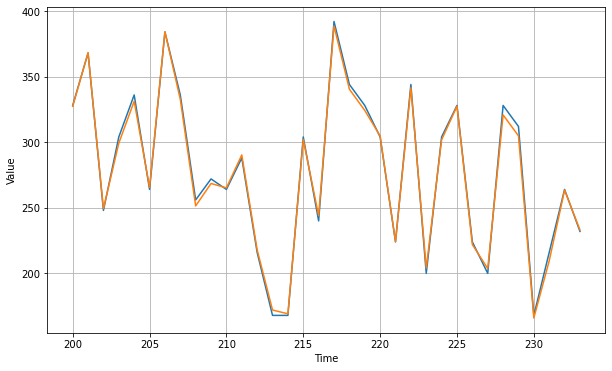

In [75]:
plot_umay = plot_forecast(series1, steps1)
plot_umay

#### Create JSON Array
After we got the forecast value

Create .JSON file from all the series(place)

In [77]:
import ast
series_arr = [series1, series2, series3, series4, series5, series6, series7, series8, series9, series10, series11, series12]
arr = []
for i in range(12):
    js = forecast_new(series_arr[i], place[i], id[i], steps=7)
    arr.append(js)

as_dicts = [ast.literal_eval(x) for x in arr]
as_json = json.dumps(as_dicts)
with open("data/output-latest.json", "w") as file:
    file.write(as_json)

### Upload file output
File output diupload ke cloud storage

#### Format file output: 
`output-latest.json` dan `output-[timestamp].json`, boleh juga kalau mau upload bentuk lainnya (misal HDF5 nya dll.)
> Pastikan output **disimpan ke direktori data**

In [50]:
%%bash

gsutil -q cp data/output* gs://$BUCKET_NAME/data/

In [1]:
as_dicts

NameError: name 'as_dicts' is not defined